# Heart Disease Classification

#### Objective: Predicting heart disease 

#### Dataset

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Inicialization

### imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler

### Auxiliary functions

In [4]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [5]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

## Data visualization

In [7]:
df = pd.read_csv("heart.csv")

In [8]:
df.shape

(918, 12)

In [9]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [10]:
print("Feature number:", len(df.columns))
print("Dataset Lenght:", len(df))

Feature number: 12
Dataset Lenght: 918


In [11]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
df.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

C:\Users\David\AppData\Local\Temp\ipykernel_1568\2523719039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette='colorblind')


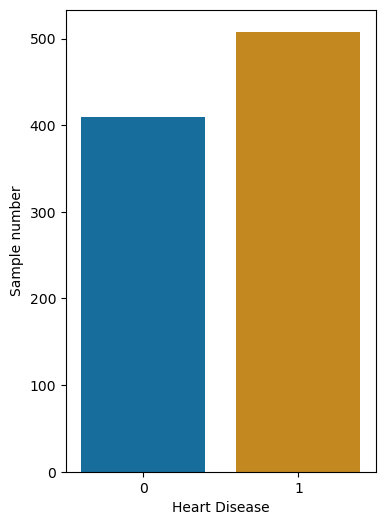

In [94]:
plt.figure(figsize=(4,6))
sns.countplot(data=df, x='HeartDisease', palette='colorblind')
plt.xlabel('Heart Disease')
plt.ylabel('Sample number')
plt.show()

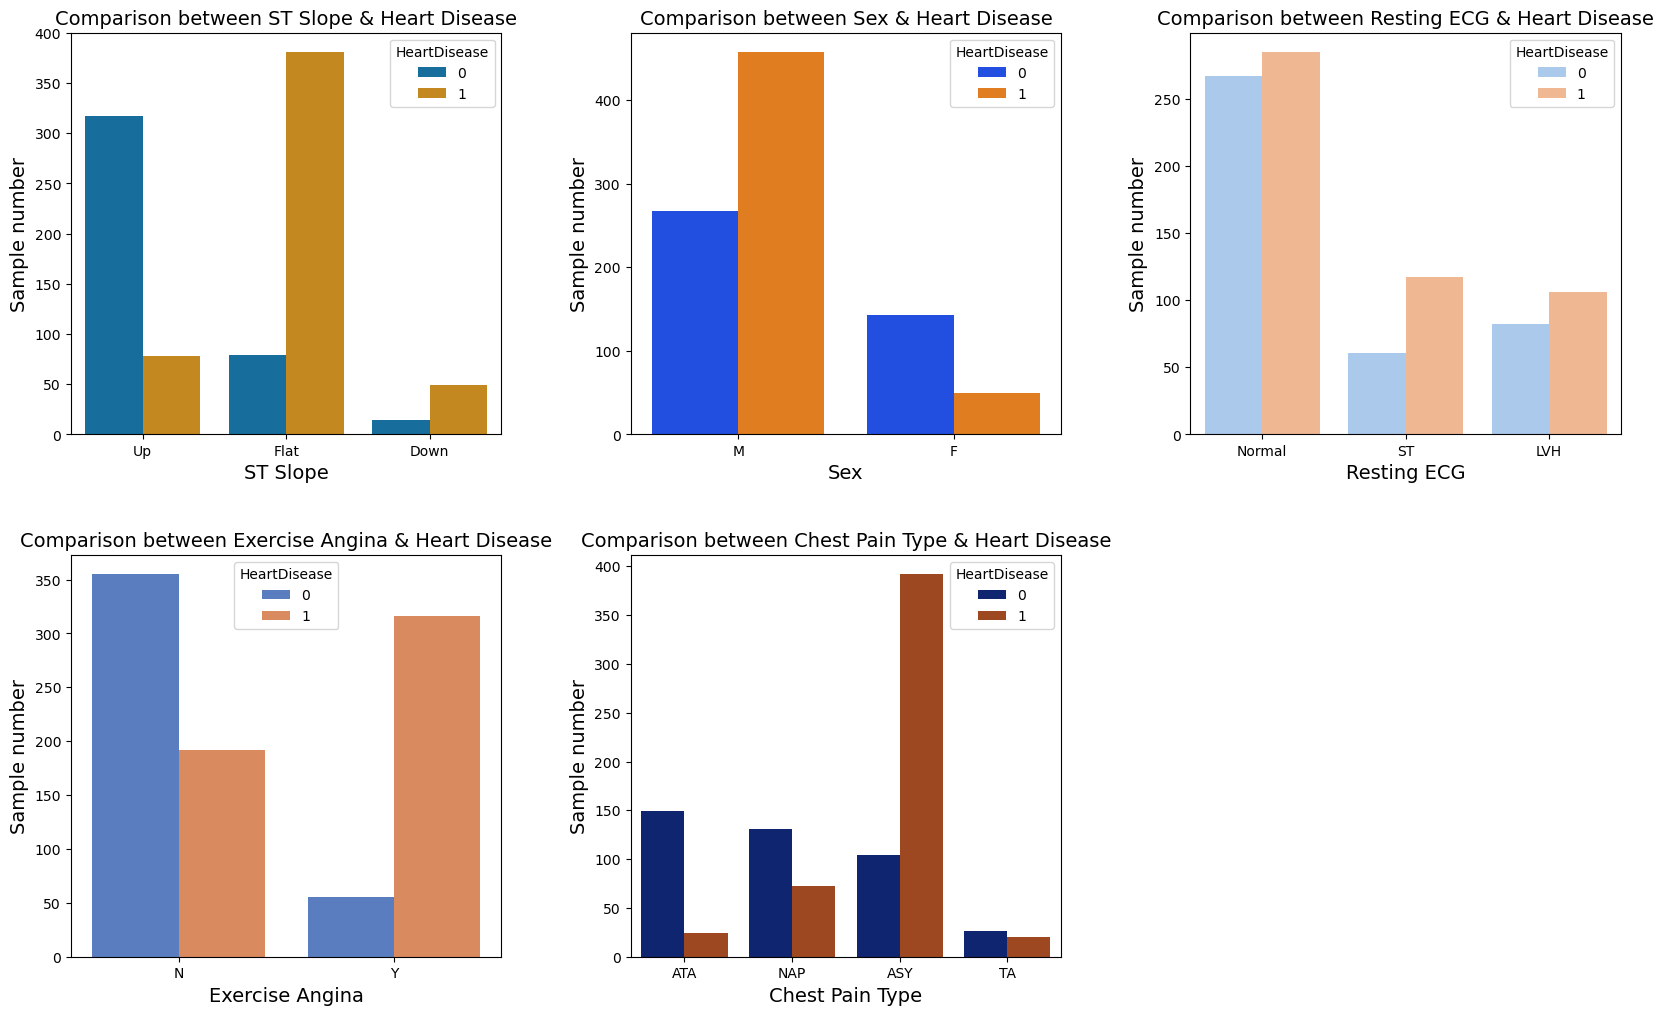

In [172]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease', palette='colorblind')
plt.xlabel('ST Slope', fontsize=14)
plt.ylabel('Sample number', fontsize=14)
plt.title('Comparison between ST Slope & Heart Disease', fontsize=14)

plt.subplot(2,3,2)
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='bright')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Sample number', fontsize=14)
plt.title('Comparison between Sex & Heart Disease', fontsize=14)

plt.subplot(2,3,3)
sns.countplot(data=df, x='RestingECG', hue='HeartDisease', palette='pastel')
plt.xlabel('Resting ECG', fontsize=14)
plt.ylabel('Sample number', fontsize=14)
plt.title('Comparison between Resting ECG & Heart Disease', fontsize=14)

plt.subplot(2,3,4)
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease', palette='muted')
plt.xlabel('Exercise Angina', fontsize=14)
plt.ylabel('Sample number', fontsize=14)
plt.title('Comparison between Exercise Angina & Heart Disease', fontsize=14)

plt.subplot(2,3,5)
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette='dark')
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Sample number', fontsize=14)
plt.title('Comparison between Chest Pain Type & Heart Disease', fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

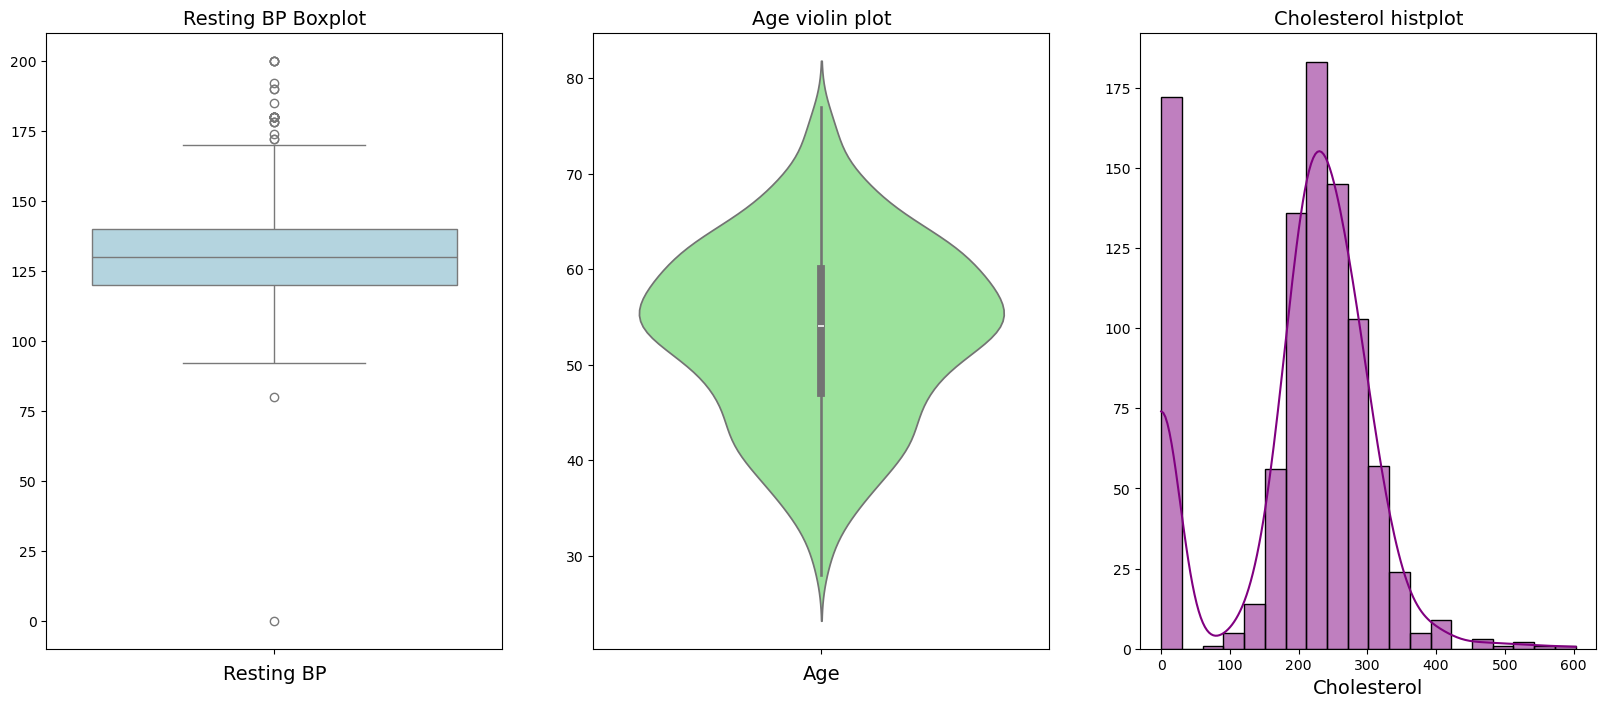

In [198]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.boxplot(y=df['RestingBP'], color='lightblue')
plt.title('Resting BP Boxplot', fontsize=14)
plt.xlabel('Resting BP', fontsize=14)
plt.ylabel('')

plt.subplot(1,3,2)
sns.violinplot(y=df['Age'], color='lightgreen')
plt.title('Age violin plot', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('')

plt.subplot(1,3,3)
sns.histplot(df['Cholesterol'], kde=True, bins=20, color='purple')
plt.title('Cholesterol histplot', fontsize=14)
plt.xlabel('Cholesterol', fontsize=14)
plt.ylabel('')

plt.show()